In [21]:
import time
import numpy as np
from scipy.spatial import distance

#topological data analysis
from ripser import ripser
from persim import plot_diagrams

#plotting and visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.patches import Circle

import matplotlib.pyplot as plt
%matplotlib inline

import math
import cmath
from definitions import pentagon

import random
# import numpy as np

#manifold learning and dim red
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE

#topological data analysis
from dreimac import CircularCoords, ToroidalCoords, GeometryExamples, PlotUtils, CircleMapUtils, ComplexProjectiveCoords, ProjectiveMapUtils, GeometryUtils


#plotting and visualization
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output, no_update
import plotly.graph_objects as go
import pandas as pd
import base64

from matplotlib import cm
# import matplotlib.pyplot as plt
# %matplotlib inline

In [22]:
# upload the excel files using pandas

penta2 = np.loadtxt('data/disjoint_tori_clean.txt', delimiter=',')

print(penta2.shape)

# print(2%%2)

(43103, 10)


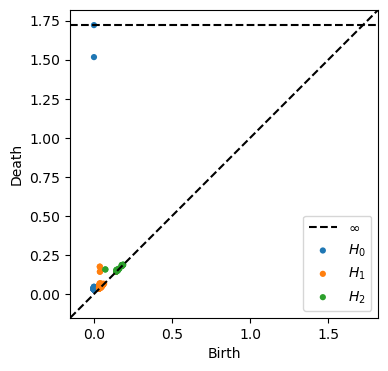

In [23]:
#Using Ripser, we will find the persistence diagrams
#Here I am referecing code from Demo 6 in Day 5 DREimac

n_land = 900
res = ripser(penta2, n_perm = n_land, maxdim=2, coeff =13, thresh = 1.8)
dgms = res['dgms']
plt.figure(figsize = (4,4))
plot_diagrams(dgms)

In [24]:
pers1 = dgms[1][:,1] - dgms[1][:,0]
pers2 = dgms[2][:,1] - dgms[2][:,0]

pers1_sorted = np.sort(pers1)[::-1]
pers2_sorted = np.sort(pers2[pers2 < np.Inf])[::-1]

print('Persistence of top 10 1-d features:\n', np.around(pers1_sorted[0:10],decimals=2), '\n')
print('Persistence of top 10 2-d features:\n', np.around(pers2_sorted[0:10],decimals=2))

Persistence of top 10 1-d features:
 [0.14 0.14 0.11 0.1  0.03 0.03 0.03 0.03 0.02 0.02] 

Persistence of top 10 2-d features:
 [0.09 0.08 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.  ]


In [25]:
n_land = 900
k_neigh = 20
dist_mat, pointcloud_permutation = GeometryUtils.landmark_geodesic_distance(penta2, n_land, k_neigh)

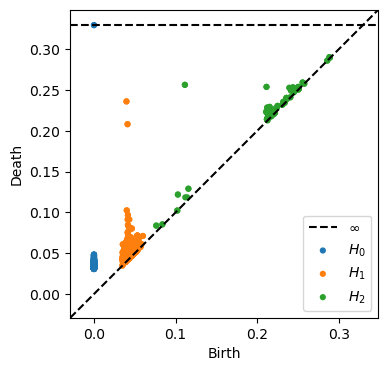

In [26]:
dist_mat.shape

#Using Ripser, we will find the persistence diagrams with geodesic distance in mind
#Here I am referecing code from the experimental branch of DREimac


res = ripser(dist_mat[:,0:dist_mat.shape[0]], distance_matrix= True,  maxdim=2, coeff =13)
dgms = res['dgms']
plt.figure(figsize = (4,4))
plot_diagrams(dgms)

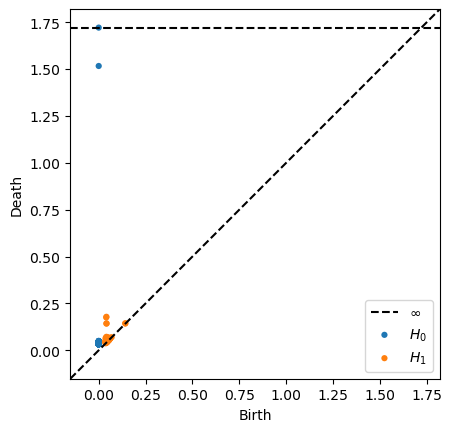

In [27]:
n_landmarks = 750

tc = ToroidalCoords(penta2, n_landmarks=n_landmarks)
plot_diagrams(tc.dgms_)

In [28]:
pers1_prime = tc.dgms_[1][:,1] - tc.dgms_[1][:,0]
# pers2_prime = tc.dgms_[2][:,1] - tc.dgms_[2][:,0]

pers1_prime_sorted = np.sort(pers1_prime)[::-1]
# pers2_prime_sorted = np.sort(pers2_prime[pers2_prime < np.Inf])[::-1]

print('Persistence of top 10 1-d features:\n', np.around(pers1_prime_sorted[0:10],decimals=2), '\n')
# print('Persistence of top 10 2-d features:\n', np.around(pers2_prime_sorted[0:10],decimals=2))


Persistence of top 10 1-d features:
 [0.14 0.14 0.1  0.1  0.03 0.03 0.03 0.03 0.03 0.03] 



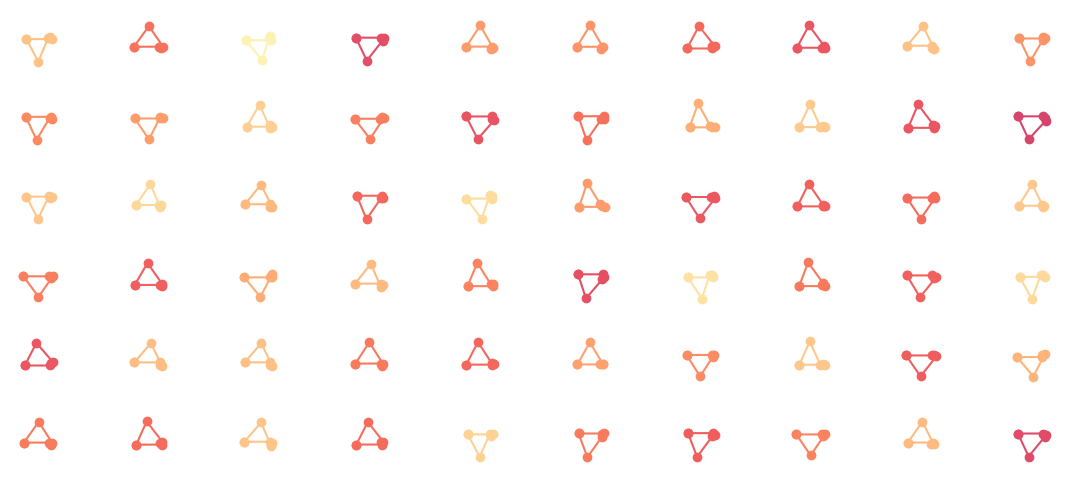

In [29]:
angle_data = np.zeros((penta2.shape[0],5)) # internal angles

for i in range(5):
    ii = (2*i -2)%10
    jj = (2*i - 1)%10
    u = penta2[:, [ii, jj]]
    
    ii = (2*i)%10
    jj = (2*i + 1)%10
    v = penta2[:, [ii , jj]]
    
    ii = (2*i + 2)%10
    jj = (2*i + 3)%10
    w = penta2[:, [ii, jj]]
    
    z = np.sum((u - v)*(w-v), axis = 1)
    
    angle_data[:,i]  = np.arccos( np.minimum(z,1) )
    
energy = np.sum((angle_data - (3/5)*np.pi)**2 , axis = 1)

# plot sample pentagons
plt.figure(figsize=(14,6))
for i in range(60):
    ind = random.randint(0, penta2.shape[0])
    x = penta2[ind].reshape(5,2).T
    cent = np.mean(x,axis=1)
    plt.subplot(6,10,i+1)
    plt.plot(x[0,range(-1,5)], x[1,range(-1,5)] , '-o', c= cm.magma(energy[ind]/np.max(energy)))
    plt.axis('square')
    plt.axis('off')
    plt.xlim(cent[0]-1.3,cent[0]+1.3);
    plt.ylim(cent[1]-1.3,cent[1]+1.3);

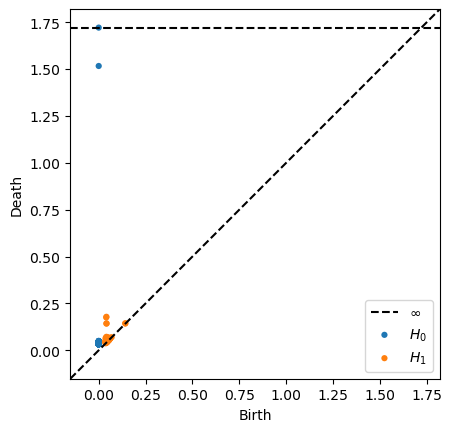

In [30]:
n_landmarks = 750

tc = ToroidalCoords(penta2, n_landmarks=n_landmarks)
plot_diagrams(tc.dgms_)

In [31]:
cohomology_classes = [0, 1, 2, 3]
toroidal_coords = tc.get_coordinates(cocycle_idxs=cohomology_classes)

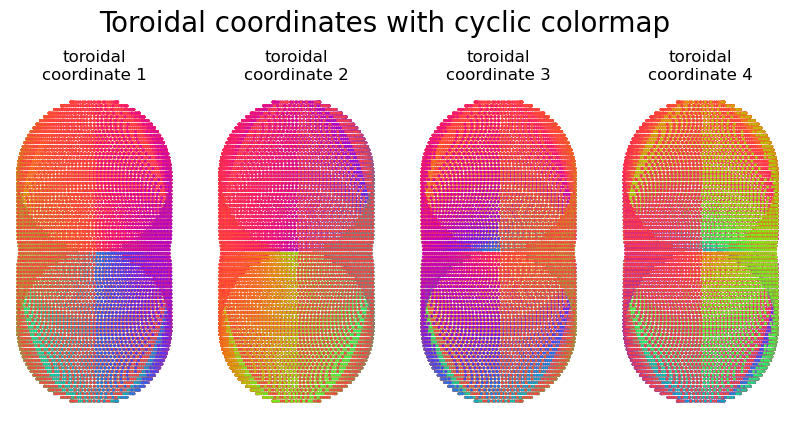

In [32]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("Toroidal coordinates with cyclic colormap", fontsize=20)
for i, coordinate in enumerate(toroidal_coords):
    plt.subplot(1, len(toroidal_coords), i + 1)
    plt.scatter(penta2[:, 3], penta2[:, 4], s=1, c=CircleMapUtils.to_sinebow(CircleMapUtils.center(coordinate)))
    plt.title("toroidal\ncoordinate " + str(i+1))
    plt.gca().set_aspect("equal") ; _ = plt.axis("off")

In [33]:
print(toroidal_coords.shape)

(4, 43103)


In [34]:
pers1 = dgms[1][:,1] - dgms[1][:,0]
pers2 = dgms[2][:,1] - dgms[2][:,0]

pers1_sorted = np.sort(pers1)[::-1]
pers2_sorted = np.sort(pers2[pers2 < np.Inf])[::-1]

print('Persistence of top 10 1-d features:\n', np.around(pers1_sorted[0:10],decimals=2), '\n')
print('Persistence of top 10 2-d features:\n', np.around(pers2_sorted[0:10],decimals=2))

n_lands = 900

cc = CircularCoords(dist_mat, n_landmarks= n_lands, distance_matrix = True)

coho_classes = [0, 1, 2, 3, 4, 5]

circular_coords = []

for i in coho_classes:
    circular_coords.append(cc.get_coordinates(perc = 0.6, cocycle_idx=i, standard_range= False))

# print("space space")
# print(circular_coords)
# print("Shape of Circular Coords")
# print(np.array(circular_coords).shape)

Persistence of top 10 1-d features:
 [0.2  0.2  0.17 0.17 0.06 0.06 0.06 0.06 0.05 0.05] 

Persistence of top 10 2-d features:
 [0.14 0.14 0.04 0.04 0.02 0.02 0.02 0.02 0.01 0.01]


In [35]:
thetas= CircleMapUtils.linear_combination(np.array(circular_coords), [[1,0,0,0], [0,1,0,0],[0,0,1,0], [0,0,0,1]])

theta1 = CircleMapUtils.center(thetas[0])
theta2 = CircleMapUtils.center(thetas[1])
theta3 = CircleMapUtils.center(thetas[2])
theta4 = CircleMapUtils.center(thetas[3])

#[[2,0,0,0], [0,1,0,0],[0,0,1,0], [0,0,0,1]]: 1,2,3
fig = go.Figure(data=[go.Scatter3d(
    x=theta1, y=theta2, z=theta3, 
    mode ='markers', 
    marker=dict(size = 3, color =energy, colorscale='plasma')
)])
fig.update_layout(autosize=False, width=700, height=700)

fig.show()

AssertionError: 

In [19]:
pers1 = dgms[1][:,1] - dgms[1][:,0]
pers2 = dgms[2][:,1] - dgms[2][:,0]

pers1_sorted = np.sort(pers1)[::-1]
pers2_sorted = np.sort(pers2[pers2 < np.Inf])[::-1]

print('Persistence of top 10 1-d features:\n', np.around(pers1_sorted[0:10],decimals=2), '\n')
print('Persistence of top 10 2-d features:\n', np.around(pers2_sorted[0:10],decimals=2))

n_lands = 900

cc = CircularCoords(dist_mat, n_landmarks= n_lands, distance_matrix = True)

coho_classes = [0, 1, 2, 3, 4, 5]

circular_coords = []

for i in coho_classes:
    circular_coords.append(cc.get_coordinates(perc = 0.6, cocycle_idx=i, standard_range= False))

# print("space space")
# print(circular_coords)
# print("Shape of Circular Coords")
# print(np.array(circular_coords).shape)

Persistence of top 10 1-d features:
 [0.2  0.2  0.17 0.17 0.06 0.06 0.06 0.06 0.05 0.05] 

Persistence of top 10 2-d features:
 [0.14 0.14 0.04 0.04 0.02 0.02 0.02 0.02 0.01 0.01]


In [20]:
#Applying Circular coords and doing TDR

thetas= CircleMapUtils.linear_combination(np.array(circular_coords), [[1,0,0,0,0,0], [0,1,0,0,0,0],[0,0,1,0,0,0], [0,0,0,1,0,0], [0,0,0,0,1,0],[0,0,0,0,0,1]])
#Standard Basis, 1,2,6 little fold

theta1 = CircleMapUtils.center(thetas[0])
theta2 = CircleMapUtils.center(thetas[1])
theta3 = CircleMapUtils.center(thetas[2])
theta4 = CircleMapUtils.center(thetas[3])
theta5 = CircleMapUtils.center(thetas[4])
theta6 = CircleMapUtils.center(thetas[5])


# Plot the data using the computed circular coordintaes, and colors given by pentagon energy
fig = go.Figure(data=[go.Scatter3d(
    x=theta1, y=theta2, z=theta3, 
    mode ='markers', 
    marker=dict(size = 3, color =energy[pointcloud_permutation], colorscale='plasma')
)])

fig.update_layout(autosize=False, width=700, height=700)

fig.show()

#Creating a 2D plot of thetas

# plt.scatter(theta1, theta2)
# plt.scatter(theta1, theta3) #good under 0,1,3,4 and standard basis
# plt.scatter(theta2, theta3)
# plt.scatter(theta1, theta4)
# plt.scatter(theta2, theta4) #perfect in standard basis under 0,1,3,4
# plt.scatter(theta3, theta4)
